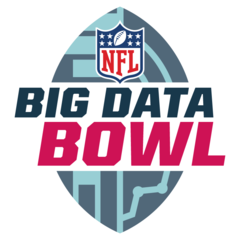

This competition uses NFL’s Next Gen Stats data, which includes the position and speed of every player on the field during each play. You’ll employ player tracking data for all drop-back pass plays from the 2018 regular season. The goal of submissions is to identify unique and impactful approaches to measure defensive performance on these plays. There are several different directions for participants to ‘tackle’ (ha)—which may require levels of football savvy, data aptitude, and creativity

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Libraries

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Players

In [ ]:
players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/players.csv")
players.head()

In [ ]:
df = players.groupby('collegeName')['nflId'].count().reset_index(name = 'counts')
df = df.sort_values(by = 'counts', ascending = False)
fig = px.bar(df[:20], x='collegeName', y='counts', color = 'collegeName')
fig.update_layout(title_text="Top 20 Colleges where players from")
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = players.groupby('collegeName')['nflId'].count().reset_index(name = 'counts')
df = df.sort_values(by = 'counts', ascending = False)
fig = px.bar(df[:20], x='collegeName', y='counts', color = 'collegeName')
fig.update_layout(title_text="Top 20 Colleges where players from")
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
players.height = players.height.str.replace('-','*12+').apply(lambda x: eval(x))
df = players.groupby('height')['nflId'].count().reset_index(name = 'counts')
df = df.sort_values(by = 'counts', ascending = False)
fig = px.bar(df, x='height', y='counts', color = 'height')
fig.update_layout(title_text="Average height in Inches: "+ str(round(players.height.mean(),2)))
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = players.groupby('weight')['nflId'].count().reset_index(name = 'counts')
fig = px.bar(df, x='weight', y='counts')
fig.update_layout(title_text="Average weight in Pounds: "+ str(round(players.weight.mean(),2)))
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
players.birthDate = pd.to_datetime(players.birthDate)
players['birthyear'] = players['birthDate'].dt.year
df = players.groupby('birthyear')['nflId'].count().reset_index(name = 'counts')
fig = px.bar(df, x='birthyear', y='counts', color = 'birthyear')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

**Most players are young talents.**

In [ ]:
df = players.groupby('position')['nflId'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='position', y='counts', color = 'position')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
p_he = players.groupby(['position','height'])['nflId'].count().reset_index(name = 'counts')
fig = px.scatter(p_he, x="height", y="position", size = 'counts', color = 'counts')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
p_we = players.groupby(['position','weight'])['nflId'].count().reset_index(name = 'counts')
fig = px.scatter(p_we, x="weight", y="position", size = 'counts', color = 'counts')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
p_clg = players.groupby(['collegeName','position'])['nflId'].count().reset_index(name = 'counts')
fig = px.scatter(p_clg, x="collegeName", y="position", size = 'counts', color = 'counts')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

**Clemson, Texas tech** those 2 colleges porvides highest number of players in the place of **WR**

## Plays

In [ ]:
plays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/plays.csv")
pd.set_option('display.max_columns',50)
plays.head()

In [ ]:
df = plays.groupby("offenseFormation")['playId'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='offenseFormation', title='Offense Formation Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
yardline = plays.groupby('yardlineNumber')['playId'].count().reset_index(name = 'counts').sort_values(by='counts', ascending = False)
fig = px.bar(yardline[:10], x='yardlineNumber', y='counts', color = 'yardlineNumber')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

Highest number of play begins at 25th yardline

In [ ]:
df = plays.groupby("yardlineSide")['playId'].count().reset_index(name = 'counts')
fig = px.bar(df, x='yardlineSide', y='counts', color = 'yardlineSide')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = plays.groupby("quarter")['playId'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='quarter', title='Quarter Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = plays.groupby("down")['playId'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='down', title='Down Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = plays.groupby("yardsToGo")['playId'].count().reset_index(name = 'counts')
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax = sns.barplot(x="yardsToGo", y="counts", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Yards to go')
plt.show()

In [ ]:
df = plays.groupby("playType")['playId'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='playType', title='playType Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
cr = plays.groupby("passResult")['playId'].count().reset_index(name = 'counts')
ax = sns.barplot(x="passResult", y="counts", data=cr)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
cr = plays.groupby("offensePlayResult")['playId'].count().reset_index(name = 'counts')
cr = cr.sort_values(by= 'counts', ascending = False)
ax = sns.barplot(x="offensePlayResult", y="counts", data=cr[:20])

In [ ]:
df = plays.groupby("isDefensivePI")['playId'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='isDefensivePI', title='isDefensivePI Count')
fig.show()

## Games

In [ ]:
games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/games.csv")
games.head()

In [ ]:
df = games.groupby('homeTeamAbbr')['gameId'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='homeTeamAbbr', y='counts', color = 'homeTeamAbbr')
fig.show()

In [ ]:
df = games.groupby('visitorTeamAbbr')['gameId'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='visitorTeamAbbr', y='counts', color = 'visitorTeamAbbr')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = games.groupby('gameDate')['gameId'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='gameDate', y='counts', color = 'gameDate')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = games.groupby('gameTimeEastern')['gameId'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='gameTimeEastern', y='counts', color = 'gameTimeEastern')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = games.groupby('week')['gameId'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='week', y='counts', color = 'week')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

Collecting and Concatinating Week datasets

In [ ]:
week = pd.DataFrame()
for a in range(1,18):
    dd = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/week'+str(a)+'.csv')
    dd['week'] = 'week'+str(a)
    week = pd.concat([week,dd])

Number of games played in each week

In [ ]:
game_wk = week.groupby(['week'])['gameId'].nunique().reset_index(name = 'counts')
df = game_wk.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='week', y='counts', color = 'week')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
game_wk = week.groupby(['week'])['playId'].nunique().reset_index(name = 'counts')
df = game_wk.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='week', y='counts', color = 'week')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = week.groupby("team")['team'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='team', title='Team Counts')
fig.show()

In [ ]:
df = week.groupby("playDirection")['playDirection'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='playDirection', title='playDirection Counts')
fig.show()

In [ ]:
df = week.groupby("route")['route'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='route', title='Route Counts')
fig.show()

In [ ]:
df = week.groupby("position")['position'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='position', title='Position Counts')
fig.show()

In [ ]:
week['time'] = pd.to_datetime(week['time'])
week['date']=week['time'].dt.date

In [ ]:
week['month'] = week['time'].dt.month
month_game = week.groupby('month')['gameId'].nunique().reset_index(name = 'counts')
month_game['month'] = month_game['month'].astype(str)
fig = px.bar(month_game, x='month', y='counts', color = 'month')
fig.update_layout(title = 'Number of games played in a month',
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
week['hour']=week['time'].dt.hour
hr = week.groupby('hour')['hour'].count().reset_index(name = 'counts')
fig = px.bar(hr, x='hour', y='counts', color = 'hour')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

Almost all the games played in the night time only

In [ ]:
week['day']=week['time'].dt.day
hr = week.groupby('day')['day'].count().reset_index(name = 'counts')
fig = px.bar(hr, x='day', y='counts', color = 'day')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

Higher number of games played on Sunday

In [ ]:
week.head()

In [ ]:
hr = week.groupby('event')['event'].count().reset_index(name = 'counts')
hr.drop(hr[hr.event == 'None'].index, inplace=True)
hr = hr.sort_values(by=['counts'])
fig = px.bar(hr, x='event', y='counts', color = 'event')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

### Most happened 5 events

In [ ]:
big = hr.nlargest(5,'counts')
fig = px.bar(big, x='event', y='counts', color = 'event')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
sm = hr.nsmallest(5,'counts')
fig = px.bar(sm, x='event', y='counts', color = 'event')
fig.update_layout(
    autosize=False,
    width=900,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

************ Notebook under construction ************